In [85]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from konlpy.tag import Kkma,Twitter
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import csv
from tqdm import tqdm

In [64]:
d = pd.read_excel('test.xlsx',sheet_name='sheet1')

In [65]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26344 entries, 0 to 26343
Data columns (total 13 columns):
연월      26344 non-null int64
전시제목    26344 non-null object
링크      26344 non-null object
전시작가    26344 non-null object
전시일정    26344 non-null object
초대일시    18971 non-null object
관람시간    26342 non-null object
전시장소    26342 non-null object
주소      26326 non-null object
연락처     26342 non-null object
홈페이지    21614 non-null object
아티클     26326 non-null object
텍스트     25621 non-null object
dtypes: int64(1), object(12)
memory usage: 2.8+ MB


In [66]:
d.dropna(subset=['텍스트'],inplace=True) #텍스트 없는 로우 드랍

In [67]:
sum(d.duplicated(subset=['텍스트'])) # 중복된 텍스트 수 

5101

In [68]:
toDropIndex = d[d.duplicated(subset=['텍스트'])].index

In [69]:
d.drop(index = toDropIndex, inplace=True)

In [70]:
toDropIndex = d[d.duplicated(subset=['전시제목','전시일정'])].index #그래도 같은 전시는 drop

In [71]:
d.drop(index = toDropIndex, inplace=True)

In [72]:
d.info() # 20514 개 데이터

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 0 to 26343
Data columns (total 13 columns):
연월      20514 non-null int64
전시제목    20514 non-null object
링크      20514 non-null object
전시작가    20514 non-null object
전시일정    20514 non-null object
초대일시    16757 non-null object
관람시간    20514 non-null object
전시장소    20514 non-null object
주소      20514 non-null object
연락처     20514 non-null object
홈페이지    17162 non-null object
아티클     20514 non-null object
텍스트     20514 non-null object
dtypes: int64(1), object(12)
memory usage: 2.2+ MB


In [78]:
d20514 = d.reset_index(drop=True)

In [80]:
d20514.to_excel('d20514.xlsx')

In [81]:
with open('d20514.csv', 'w',newline='', encoding='cp949') as fp: # 인코딩문제
    wr = csv.writer(fp)
    for i in range(d20514.shape[0]):
        wr.writerow(d20514.iloc[i,:])

UnicodeEncodeError: 'cp949' codec can't encode character '\u8d5e' in position 14: illegal multibyte sequence

In [11]:
# kkma = Kkma()
twitter = Twitter()

In [18]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
tokens = []
for txt in d.텍스트:
    if txt==None:
        continue
    tokens.append(twitter.morphs(txt)) #morphs 를 가져오자

In [ ]:
nouns = []
for i,txt in enumerate(d.텍스트):
    try:
        nouns.append(twitter.nouns(txt)) #nouns 만 가져오자
    except Exception as e:
        continue

In [37]:
ads = []
for txt in d.텍스트:
    ads.append([tag[0] for tag in twitter.pos(txt) if tag[1] in ['Adjective','Adverb','Verb','Exclamation']])

In [86]:
ad_nouns = []
for txt in tqdm(d.텍스트):
    ad_nouns.append([tag[0] for tag in twitter.pos(txt) if tag[1] in ['Noun','Adjective','Adverb','Verb','Exclamation']])

100%|████████████████████████████████████████████████████████████████████████████| 20514/20514 [09:41<00:00, 35.30it/s]


In [38]:
len(ads)#doc 갯수

20514

#### 모든 tokens

In [ ]:
# with open('artTokens.dat','wb') as file: #pickle로 저장
#     pickle.dump(tokens,file)

In [12]:
with open('artTokens.dat','rb') as file: # load
    tokens = pickle.load(file)

In [13]:
plt.rcParams['font.family'] = 'NanumSquare' #그래프 위한 폰트설정

In [22]:
tokens_all = []
for doc in tokens:
    tokens_all += doc

In [23]:
len(tokens_all) #14804510개  tokens

14804510

In [26]:
toeken_all_count = Counter(tokens_all)

In [32]:
sorted_toeken_all_count = sorted(toeken_all_count.items(), key = lambda kv:kv[1],reverse=True) # 출현빈도수로 정렬해보자

In [44]:
sorted_toeken_all_count[:20]

[('의', 567303),
 ('.', 489810),
 ('을', 471366),
 (',', 302310),
 ('이', 276362),
 ('다', 271196),
 ('에', 244084),
 ('은', 210884),
 ('를', 208916),
 ('적', 189768),
 ('는', 187019),
 ('들', 178562),
 ('한', 152090),
 ('과', 146762),
 ('으로', 134934),
 ('것', 134905),
 ('가', 132499),
 ('에서', 116223),
 ('그', 112851),
 ('이다', 96341)]

#### nouns

In [ ]:
# with open('artNouns.dat','wb') as file: #pickle로 저장
#     pickle.dump(nouns,file)

In [17]:
with open('artNouns.dat','rb') as file: # load
    nouns = pickle.load(file)

#### ads

In [39]:
# with open('artAds.dat','wb') as file: #pickle로 저장
#     pickle.dump(ads,file)

In [40]:
with open('artAds.dat','rb') as file: # load
    ads = pickle.load(file)

#### ad_nouns

In [87]:
# with open('artAd_nouns.dat','wb') as file: #pickle로 저장
#     pickle.dump(ad_nouns,file)

In [88]:
with open('artAd_nouns.dat','rb') as file: # load
    ad_nouns = pickle.load(file)

작가별로 doc만들어보자

In [5]:
#저장된 artists 딕셔너리가져온다. 키밸류로 작가,텍스트
with open('artists.dic','rb') as file:
    artists = pickle.load(file)

In [6]:
#전시 횟수로 정렬한 sorted_artists
sorted_artists = sorted(artists.items() ,key = lambda kv: len(kv[1]), reverse=True)

In [9]:
# 전시 횟수만 뽑아보자
exh_len = list(map(lambda el:len(el[1]), sorted_artists)) 
exh_len = np.array(exh_len)

In [10]:
#전시 횟수 기초 통계
print('mean:',exh_len.mean(),
          'std:', exh_len.std(),
     )

mean: 1.8931784259147202 std: 2.3308666774362408


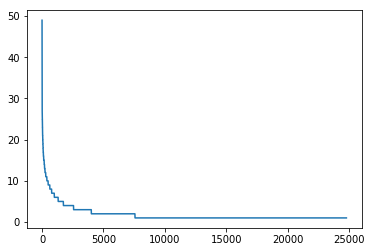

In [13]:
plt.plot(range(len(exh_len)), exh_len) # 횟수1인 작가가 압도적으로 많다

In [14]:
prolifics = sorted_artists[:20]

In [15]:
y = list(map(lambda el:len(el[1]), prolifics)) # 다작 아티스트의 전시 수 
y[0:10]

[49, 44, 39, 36, 35, 34, 31, 31, 29, 29]

In [16]:
x = list(map(lambda el:el[0], prolifics))
x[0:10]

['이이남', '백남준', '김환기', '서용선', '이우환', '김종학', '김민정', '김지은', '이지연', '변대용']

In [17]:
plt.rcParams['font.family'] = 'NanumSquare' #그래프 위한 폰트설정

<Container object of 20 artists>

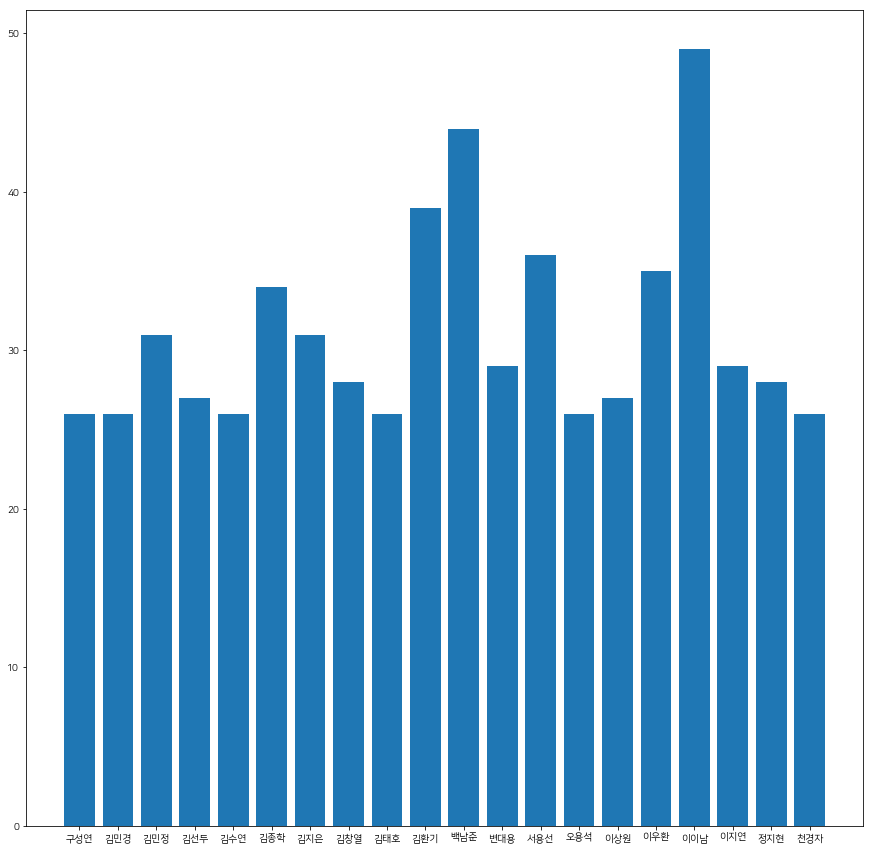

In [18]:
plt.figure(figsize = (15,15))
plt.bar(x,y)

In [19]:
sorted_artists_corpus= list(map(lambda el:(el[0], '\n'.join(el[1])), sorted_artists))

In [20]:
sorted_artists_corpus[19000]

('심정아',
 '● “환경과 인간, 예술에게 길을 묻다”, 자연과 생태, 문화와 도시展\n        양평군립미술관에서 열리는 양평환경미술제가 올해로 다섯 해를 맞이한다. <“환경과 인간, 예술에게 길을 묻다”, 자연과 생태, \n        문화와 도시>전은 최근 국내외에서 활동하고 있는 10명의 작가들이 각기 다른 관점에서 해석한 환경미술을 선보일 예정이다.\n\n\n이번 전시회에서는 \n        소개하고자 하는 것은 우리와 예술을 둘러싼 기본 환경인 ‘자연과 문화’, ‘문화와 도시’, ‘자연과 생태’, ‘생태와 도시’의 \n        네 가지 테마 안에서 ‘자연과 생태’, ‘문화와 도시’라는 두 영역을 선택하여 집중적이고 심도 깊은 조형적 발언을 선보인다.\n\n        이배, 김강용, 정일랑, 심정아, 정원철, 김근중의 작품에서는 생태 순환적 발상, 자연에서 터득한 소박하고 겸손한 예술적 발언, \n        자연으로부터의 치유, 삶과 예술의 동질성에 관한 접근방식들을 볼 수 있을 것이다. 그러면 이문주, 이태경, 주도양, 고정남의 \n        작품에서는 환경변화의 과정, 도시환경의 리얼리티와 이상도시의 가상현실, 현실에 대한 카메라의 차가운 앵글, 외부환경에 대한 인간 \n        내면의 심리지도에 관한 접근방식들을 볼 수 있을 것이다.\n\n\n다섯 번째 양평환경미술제는 \n        ‘사람과 환경을 위한 예술’로 가는 길을 묻는 작은 시작이자 원대한 염원을 품은 제식과도 같은 행사이다. 환경미술이 지향해야 \n        할 바람직한 방향을 모색하고, 환경미술에 대한 보편적 공감대를 얻는 정의를 찾고자 한다. ⓒ')

corpus에서 tokens를 뽑아내자

In [27]:
artists_lst = []
for artist in sorted_artists_corpus[:1000]:
    tokens = twitter.morphs(artist[1])
    artists_lst.append((artist[0],tokens))

In [28]:
artists_lst[999]

('이호진(Lee Hojin)',
 ['인천광역시',
  '동구',
  '창',
  '영동',
  '7',
  '번지',
  '옛',
  '인천',
  '양조장',
  '건물',
  ',',
  '배다리',
  '마을',
  '골목길',
  '한',
  '켠',
  '에',
  '스페이스',
  '빔',
  '이',
  '있다',
  '.',
  '무겁',
  '게',
  '녹이',
  '슨',
  '철문',
  '은',
  '열려',
  '있었',
  '고',
  '각종',
  '행사',
  '를',
  '알리는',
  '포스터',
  '와',
  '안내',
  '장',
  '들이',
  '붙어',
  '있었',
  '을',
  '뿐',
  '이었',
  '다',
  '.',
  '언뜻',
  '무',
  '뚝뚝',
  '해',
  '보였',
  '다',
  '.',
  '아마도',
  '그',
  '옆',
  '에',
  '서',
  '있는',
  '깡통',
  '로봇',
  '이',
  '아니었',
  '다면',
  '더',
  '무',
  '뚝뚝',
  '해',
  '보였',
  '을지',
  '모를',
  '일이',
  '지만',
  '그래서',
  '여느',
  '장소',
  '와는',
  '달리',
  '그',
  '안',
  '을',
  '더',
  '들여다보고',
  '싶은',
  '호기심',
  '을',
  '자극하고',
  '있었',
  '다',
  '.',
  '철문',
  '의',
  '좁',
  '은',
  '입구',
  '들',
  '지나',
  '들어선',
  '스페이스',
  '빔',
  '1',
  '층',
  '전시장',
  '은',
  '전시',
  '가',
  '없는',
  '때',
  '라서',
  '말',
  '그대로',
  '비어',
  '있었',
  '다',
  '.',
  '좁',
  '고',
  '높다',
  '란',
  '계단',
  '을',
  '따라',
  '들어서는',
  '2',
  '층',
  '공간'

In [29]:
with open('artists.lst','wb') as file:
    pickle.dump(artists_lst,file)